# Check GPU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Prepare Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras_preprocessing.image import ImageDataGenerator

In [6]:
data_path = pathlib.Path('/content/drive/MyDrive/deeplearn/data')

all_images = list(data_path.glob(r'*/*.jpg')) + list(data_path.glob(r'*/*.jpeg')) + list(data_path.glob(r'*/*.png'))

images = []
labels = []

for item in all_images:
    path = os.path.normpath(item)
    splits = path.split(os.sep)
    if 'GT' not in splits[-2]:
        images.append(item)
        label = splits[-2]
        labels.append(label)

In [7]:
image_pathes = pd.Series(images).astype(str)
labels = pd.Series(labels)

dataframe =pd.concat([image_pathes, labels], axis=1)

dataframe.columns = ['images', 'labels']

dataframe.head()

,images,labels
0,/content/drive/MyDrive/deeplearn/data/Ang Thon...,Ang Thong
1,/content/drive/MyDrive/deeplearn/data/Ang Thon...,Ang Thong
2,/content/drive/MyDrive/deeplearn/data/Ang Thon...,Ang Thong
3,/content/drive/MyDrive/deeplearn/data/Ang Thon...,Ang Thong
4,/content/drive/MyDrive/deeplearn/data/Ang Thon...,Ang Thong


In [8]:
dataframe.groupby('labels').count()

,images
labels,
Amnat Charoen,21
Ang Thong,19
Bangkok,28
Bueng Kan,24
Buri Ram,23
...,...
Udon Thani,36
Uthai Thani,31
Uttaradit,28


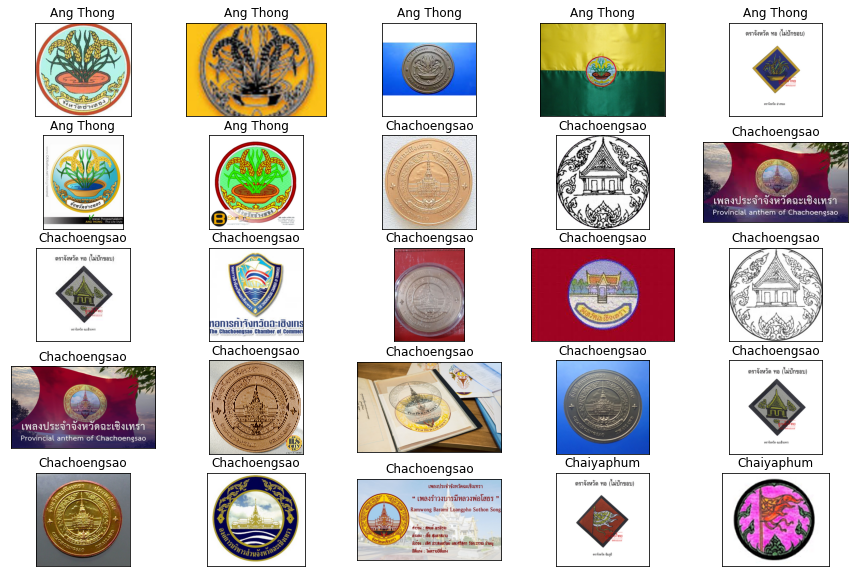

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(dataframe.images[i]))
    ax.set_title(dataframe.labels[i])
plt.show()

In [58]:
shuffled_dataframe = dataframe.sample(frac = 1)

In [59]:
all_train, test = train_test_split(shuffled_dataframe, test_size=0.2, random_state=42)
train, val = train_test_split(all_train, test_size=0.3, random_state=42)

In [60]:
test.head()

,images,labels
1598,/content/drive/MyDrive/deeplearn/data/Kamphaen...,Kamphaeng Phet
1918,/content/drive/MyDrive/deeplearn/data/Sa Kaeo/...,Sa Kaeo
1682,/content/drive/MyDrive/deeplearn/data/Nakhon R...,Nakhon Ratchasima
541,/content/drive/MyDrive/deeplearn/data/Phetchab...,Phetchabun
304,/content/drive/MyDrive/deeplearn/data/Nakhon S...,Nakhon Sawan


In [61]:
training_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_generator = training_data_gen.flow_from_dataframe(dataframe=train,
                                                          x_col='images', y_col='labels',
                                                          target_size=(224, 224),
                                                          color_mode='rgb',
                                                          class_mode='categorical',
                                                          batch_size=64)

val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
validation_generator = val_data_gen.flow_from_dataframe(dataframe=val,
                                                       x_col='images', y_col='labels',
                                                       target_size=(224, 224),
                                                       color_mode='rgb',
                                                       class_mode='categorical',
                                                       batch_size=64)

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_generator = test_data_gen.flow_from_dataframe(dataframe=test,
                                                  x_col='images', y_col='labels',
                                                  target_size=(224, 224),
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  batch_size=64,
                                                  shuffle=False)

Found 1192 validated image filenames belonging to 77 classes.
Found 511 validated image filenames belonging to 77 classes.
Found 426 validated image filenames belonging to 77 classes.


In [56]:
label_map = test_generator.class_indices
label_map

{'Amnat Charoen': 0,
 'Ang Thong': 1,
 'Bangkok': 2,
 'Bueng Kan': 3,
 'Buri Ram': 4,
 'Chachoengsao': 5,
 'Chai Nat': 6,
 'Chaiyaphum': 7,
 'Chanthaburi': 8,
 'Chiang Mai': 9,
 'Chiang Rai': 10,
 'Chon Buri': 11,
 'Chumphon': 12,
 'Kalasin': 13,
 'Kamphaeng Phet': 14,
 'Kanchanaburi': 15,
 'Khon Kaen': 16,
 'Krabi': 17,
 'Lampang': 18,
 'Lamphun': 19,
 'Loei': 20,
 'Lop Buri': 21,
 'Mae Hong Son': 22,
 'Maha Sarakham': 23,
 'Mukdahan': 24,
 'Nakhon Nayok': 25,
 'Nakhon Pathom': 26,
 'Nakhon Phanom': 27,
 'Nakhon Ratchasima': 28,
 'Nakhon Sawan': 29,
 'Nakhon Si Thammarat': 30,
 'Nan': 31,
 'Narathiwat': 32,
 'Nong Bua Lam Phu': 33,
 'Nong Khai': 34,
 'Nonthaburi': 35,
 'Pathum Thani': 36,
 'Pattani': 37,
 'Phang Nga': 38,
 'Phatthalung': 39,
 'Phayao': 40,
 'Phetchabun': 41,
 'Phetchaburi': 42,
 'Phichit': 43,
 'Phitsanulok': 44,
 'Phra Nakhon Si Ayutthaya': 45,
 'Phrae': 46,
 'Phuket': 47,
 'Prachin Buri': 48,
 'Prachuap Khiri Khan': 49,
 'Ranong': 50,
 'Ratchaburi': 51,
 'Rayong': 5

In [44]:
test_generator.class_indices.keys()

dict_keys(['Amnat Charoen', 'Ang Thong', 'Bangkok', 'Bueng Kan', 'Buri Ram', 'Chachoengsao', 'Chai Nat', 'Chaiyaphum', 'Chanthaburi', 'Chiang Mai', 'Chiang Rai', 'Chon Buri', 'Chumphon', 'Kalasin', 'Kamphaeng Phet', 'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang', 'Lamphun', 'Loei', 'Lop Buri', 'Mae Hong Son', 'Maha Sarakham', 'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nakhon Sawan', 'Nakhon Si Thammarat', 'Nan', 'Narathiwat', 'Nong Bua Lam Phu', 'Nong Khai', 'Nonthaburi', 'Pathum Thani', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phayao', 'Phetchabun', 'Phetchaburi', 'Phichit', 'Phitsanulok', 'Phra Nakhon Si Ayutthaya', 'Phrae', 'Phuket', 'Prachin Buri', 'Prachuap Khiri Khan', 'Ranong', 'Ratchaburi', 'Rayong', 'Roi Et', 'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan', 'Samut Sakhon', 'Samut Songkhram', 'Saraburi', 'Satun', 'Si Sa Ket', 'Sing Buri', 'Songkhla', 'Sukhothai', 'Suphan Buri', 'Surat Thani', 'Surin', 'Tak', 'Trang', 'Trat', 'Ubon Ratchathani'

# Import Model and Finetuning

In [16]:
!pip install segmentation-models

!pip install tensorflow
!pip install keras
!pip install tensorflow-estimator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import efficientnet.keras as efn
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

16804768/16804768 [==============================] - 1s 0us/step


In [18]:
for layer in base_model.layers:
    layer.trainable = False
    
from tensorflow.keras import layers 
from tensorflow.keras import Model 

In [19]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

x = layers.Dense(77, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [20]:
vgghist = model.fit(training_generator, validation_data = validation_generator, epochs = 50)

Epoch 1/50
 2/19 [==>...........................] - ETA: 4:53 - loss: 5.5516 - acc: 0.0234 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/19 [==============================] - 690s 36s/step - loss: 4.7348 - acc: 0.0361 - val_loss: 3.9579 - val_acc: 0.1370
Epoch 2/50
19/19 [==============================] - 35s 2s/step - loss: 3.9883 - acc: 0.1183 - val_loss: 3.5999 - val_acc: 0.2211
Epoch 3/50
19/19 [==============================] - 35s 2s/step - loss: 3.5741 - acc: 0.1938 - val_loss: 3.1641 - val_acc: 0.3190
Epoch 4/50
19/19 [==============================] - 35s 2s/step - loss: 3.1876 - acc: 0.2508 - val_loss: 2.9754 - val_acc: 0.3699
Epoch 5/50
19/19 [==============================] - 34s 2s/step - loss: 2.8626 - acc: 0.3364 - val_loss: 2.6552 - val_acc: 0.4364
Epoch 6/50
19/19 [==============================] - 35s 2s/step - loss: 2.5937 - acc: 0.3742 - val_loss: 2.4191 - val_acc: 0.5166
Epoch 7/50
19/19 [==============================] - 37s 2s/step - loss: 2.3286 - acc: 0.4337 - val_loss: 2.2343 - val_acc: 0.5656
Epoch 8/50
19/19 [==============================] - 35s 2s/step - loss: 2.0649 - acc: 0.5017 - val_

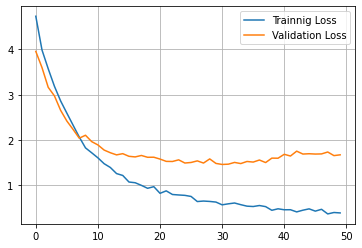

In [21]:
model_train_loss = vgghist.history['loss']
model_val_loss = vgghist.history['val_loss']

plt.plot(vgghist.epoch, model_train_loss, label='Trainnig Loss')
plt.plot(vgghist.epoch, model_val_loss, label='Validation Loss')
plt.grid(True)
plt.legend()

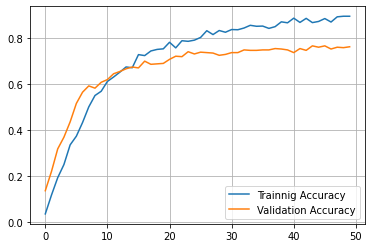

In [22]:
train_acc = vgghist.history['acc']
val_acc = vgghist.history['val_acc']

plt.plot(vgghist.epoch, train_acc, label='Trainnig Accuracy')
plt.plot(vgghist.epoch, val_acc, label='Validation Accuracy')
plt.grid(True)
plt.legend()

In [45]:
model.evaluate(test_generator)

7/7 [==============================] - 8s 1s/step - loss: 0.5652 - acc: 0.9014


[0.5651854276657104, 0.9014084339141846]

In [46]:
# Switch Dict and Value
label_map_switch = {}
for k, v in label_map.items():
    label_map_switch[v] = k
label_map_switch

{0: 'Amnat Charoen',
 1: 'Ang Thong',
 2: 'Bangkok',
 3: 'Bueng Kan',
 4: 'Buri Ram',
 5: 'Chachoengsao',
 6: 'Chai Nat',
 7: 'Chaiyaphum',
 8: 'Chanthaburi',
 9: 'Chiang Mai',
 10: 'Chiang Rai',
 11: 'Chon Buri',
 12: 'Chumphon',
 13: 'Kalasin',
 14: 'Kamphaeng Phet',
 15: 'Kanchanaburi',
 16: 'Khon Kaen',
 17: 'Krabi',
 18: 'Lampang',
 19: 'Lamphun',
 20: 'Loei',
 21: 'Lop Buri',
 22: 'Mae Hong Son',
 23: 'Maha Sarakham',
 24: 'Mukdahan',
 25: 'Nakhon Nayok',
 26: 'Nakhon Pathom',
 27: 'Nakhon Phanom',
 28: 'Nakhon Ratchasima',
 29: 'Nakhon Sawan',
 30: 'Nakhon Si Thammarat',
 31: 'Nan',
 32: 'Narathiwat',
 33: 'Nong Bua Lam Phu',
 34: 'Nong Khai',
 35: 'Nonthaburi',
 36: 'Pathum Thani',
 37: 'Pattani',
 38: 'Phang Nga',
 39: 'Phatthalung',
 40: 'Phayao',
 41: 'Phetchabun',
 42: 'Phetchaburi',
 43: 'Phichit',
 44: 'Phitsanulok',
 45: 'Phra Nakhon Si Ayutthaya',
 46: 'Phrae',
 47: 'Phuket',
 48: 'Prachin Buri',
 49: 'Prachuap Khiri Khan',
 50: 'Ranong',
 51: 'Ratchaburi',
 52: 'Rayong

In [63]:
predictions = model.predict(test_generator)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
predicted_label_batch =list(map(label_map_switch.get, pred_labels.tolist()))

7/7 [==============================] - 5s 790ms/step


In [64]:
test_dup = test.copy()
test_dup = test_dup.reset_index(drop=True)
test_dup["predict"] = pd.DataFrame(predicted_label_batch)
test_dup.head()

,images,labels,predict
0,/content/drive/MyDrive/deeplearn/data/Kamphaen...,Kamphaeng Phet,Kamphaeng Phet
1,/content/drive/MyDrive/deeplearn/data/Sa Kaeo/...,Sa Kaeo,Sa Kaeo
2,/content/drive/MyDrive/deeplearn/data/Nakhon R...,Nakhon Ratchasima,Nakhon Ratchasima
3,/content/drive/MyDrive/deeplearn/data/Phetchab...,Phetchabun,Phetchabun
4,/content/drive/MyDrive/deeplearn/data/Nakhon S...,Nakhon Sawan,Nakhon Sawan


In [65]:
y_pred = [label_map_switch[k] for k in pred_labels]
print(classification_report(test.labels, y_pred))

                          precision    recall  f1-score   support

           Amnat Charoen       0.80      1.00      0.89         4
               Ang Thong       1.00      0.50      0.67         2
                 Bangkok       1.00      1.00      1.00         3
               Bueng Kan       0.67      0.80      0.73         5
                Buri Ram       1.00      1.00      1.00         2
            Chachoengsao       0.89      1.00      0.94         8
                Chai Nat       0.00      0.00      0.00         2
              Chaiyaphum       1.00      1.00      1.00         7
             Chanthaburi       1.00      1.00      1.00         6
              Chiang Mai       1.00      1.00      1.00         8
              Chiang Rai       1.00      1.00      1.00        15
               Chon Buri       1.00      0.50      0.67         2
                Chumphon       1.00      1.00      1.00         2
                 Kalasin       0.75      1.00      0.86         3
         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


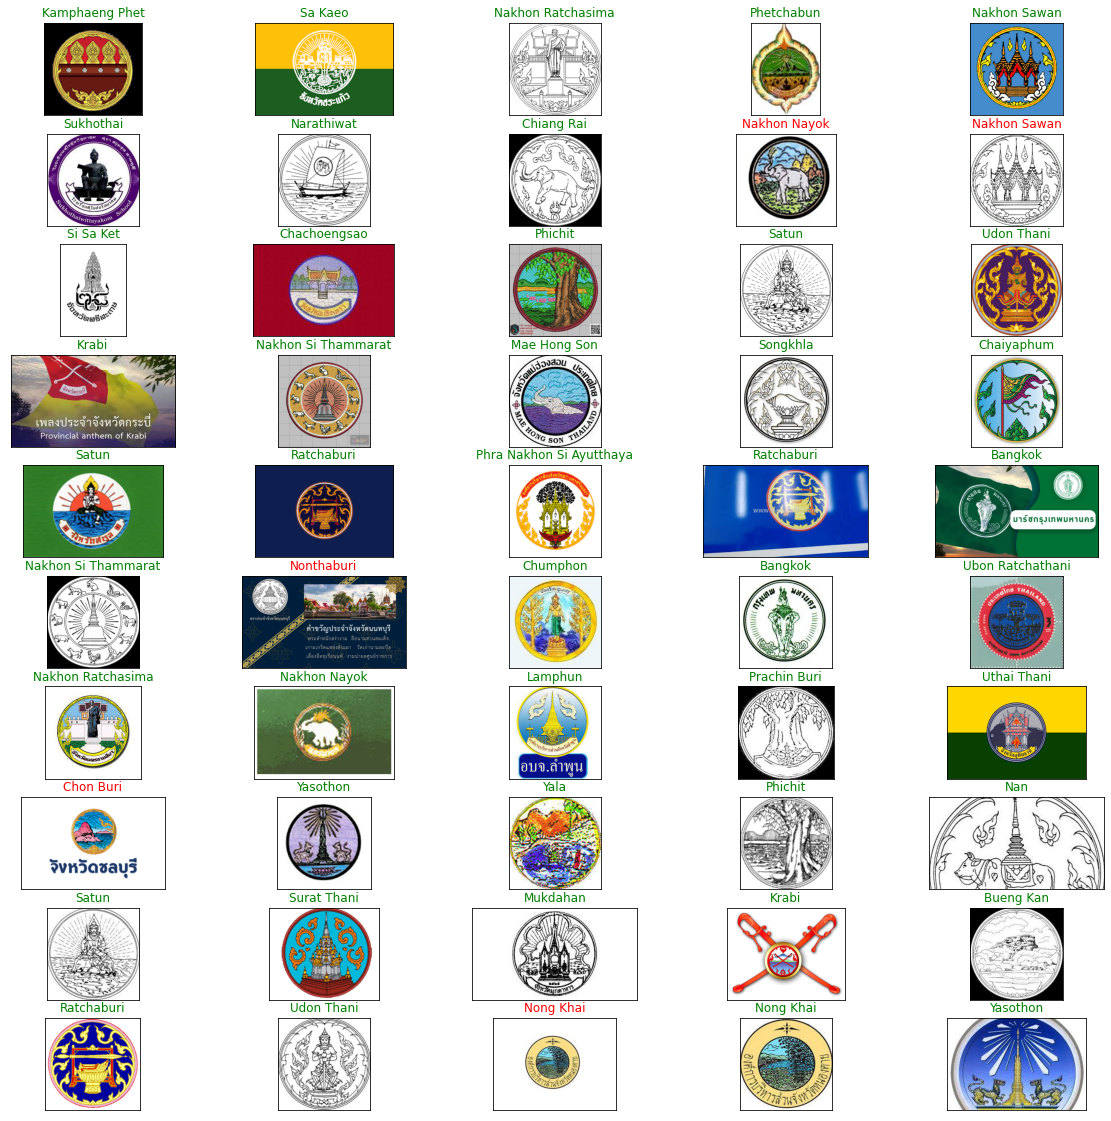

In [66]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_dup.images[i]))
    color = "green" if test_dup.predict[i] == test_dup.labels[i] else "red"
    ax.set_title(test_dup.labels[i],color=color)
plt.show()

# Base Model

In [31]:
import efficientnet.keras as efn
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [32]:
for layer in base_model.layers:
    layer.trainable = True
    
from tensorflow.keras import layers 
from tensorflow.keras import Model 

In [33]:
y = layers.Flatten()(base_model.output)
y = layers.Dense(77, activation='softmax')(y)
base_model = tf.keras.models.Model(base_model.input, y)
base_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [67]:
basehist = base_model.fit(training_generator, validation_data = validation_generator, epochs = 50)

Epoch 1/50
 4/19 [=====>........................] - ETA: 37s - loss: 1.0948 - acc: 0.7578

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/19 [==============================] - 41s 2s/step - loss: 1.1096 - acc: 0.7601 - val_loss: 1.2068 - val_acc: 0.7319
Epoch 2/50
19/19 [==============================] - 37s 2s/step - loss: 0.7150 - acc: 0.8205 - val_loss: 0.8145 - val_acc: 0.8258
Epoch 3/50
19/19 [==============================] - 36s 2s/step - loss: 0.4708 - acc: 0.8876 - val_loss: 0.6384 - val_acc: 0.8689
Epoch 4/50
19/19 [==============================] - 36s 2s/step - loss: 0.3698 - acc: 0.9128 - val_loss: 0.5548 - val_acc: 0.8904
Epoch 5/50
19/19 [==============================] - 36s 2s/step - loss: 0.2489 - acc: 0.9471 - val_loss: 0.5268 - val_acc: 0.8943
Epoch 6/50
19/19 [==============================] - 36s 2s/step - loss: 0.2034 - acc: 0.9497 - val_loss: 0.5017 - val_acc: 0.9139
Epoch 7/50
19/19 [==============================] - 36s 2s/step - loss: 0.1740 - acc: 0.9522 - val_loss: 0.5070 - val_acc: 0.9080
Epoch 8/50
19/19 [==============================] - 37s 2s/step - loss: 0.1115 - acc: 0.9732 - val_lo

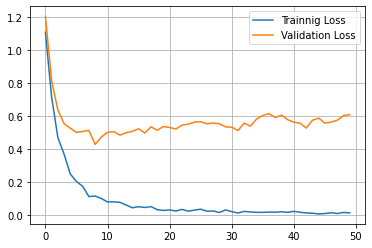

In [68]:
base_model_train_loss = basehist.history['loss']
base_model_val_loss = basehist.history['val_loss']

plt.plot(basehist.epoch, base_model_train_loss, label='Trainnig Loss')
plt.plot(basehist.epoch, base_model_val_loss, label='Validation Loss')
plt.grid(True)
plt.legend()

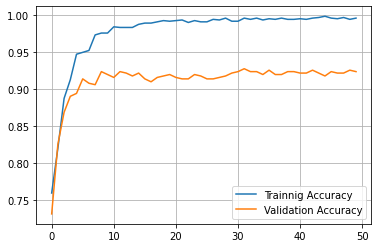

In [69]:
base_model_train_acc =basehist.history['acc']
base_model_val_acc = basehist.history['val_acc']

plt.plot(basehist.epoch, base_model_train_acc, label='Trainnig Accuracy')
plt.plot(basehist.epoch, base_model_val_acc, label='Validation Accuracy')
plt.grid(True)
plt.legend()

In [70]:
base_model.evaluate(test_generator)

7/7 [==============================] - 5s 774ms/step - loss: 0.7129 - acc: 0.8920


[0.712947428226471, 0.8920187950134277]

In [71]:
predictions2 = base_model.predict(test_generator)     # Vector of probabilities
pred_labels2 = np.argmax(predictions2, axis = 1) # We take the highest probability
predicted2_label_batch =list(map(label_map_switch.get, pred_labels2.tolist()))

7/7 [==============================] - 6s 760ms/step


In [72]:
test2_dup = test.copy()
test2_dup = test2_dup.reset_index(drop=True)
test2_dup["predict"] = pd.DataFrame(predicted2_label_batch)
test2_dup.head()

,images,labels,predict
0,/content/drive/MyDrive/deeplearn/data/Kamphaen...,Kamphaeng Phet,Kamphaeng Phet
1,/content/drive/MyDrive/deeplearn/data/Sa Kaeo/...,Sa Kaeo,Sa Kaeo
2,/content/drive/MyDrive/deeplearn/data/Nakhon R...,Nakhon Ratchasima,Nakhon Ratchasima
3,/content/drive/MyDrive/deeplearn/data/Phetchab...,Phetchabun,Rayong
4,/content/drive/MyDrive/deeplearn/data/Nakhon S...,Nakhon Sawan,Nakhon Sawan


In [73]:
y_pred2 = [label_map_switch[k] for k in pred_labels2]
print(classification_report(test.labels, y_pred2))

                          precision    recall  f1-score   support

           Amnat Charoen       1.00      1.00      1.00         4
               Ang Thong       1.00      1.00      1.00         2
                 Bangkok       1.00      1.00      1.00         3
               Bueng Kan       0.71      1.00      0.83         5
                Buri Ram       1.00      1.00      1.00         2
            Chachoengsao       1.00      0.75      0.86         8
                Chai Nat       1.00      0.50      0.67         2
              Chaiyaphum       0.88      1.00      0.93         7
             Chanthaburi       1.00      1.00      1.00         6
              Chiang Mai       1.00      1.00      1.00         8
              Chiang Rai       1.00      1.00      1.00        15
               Chon Buri       0.33      1.00      0.50         2
                Chumphon       1.00      1.00      1.00         2
                 Kalasin       1.00      1.00      1.00         3
         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


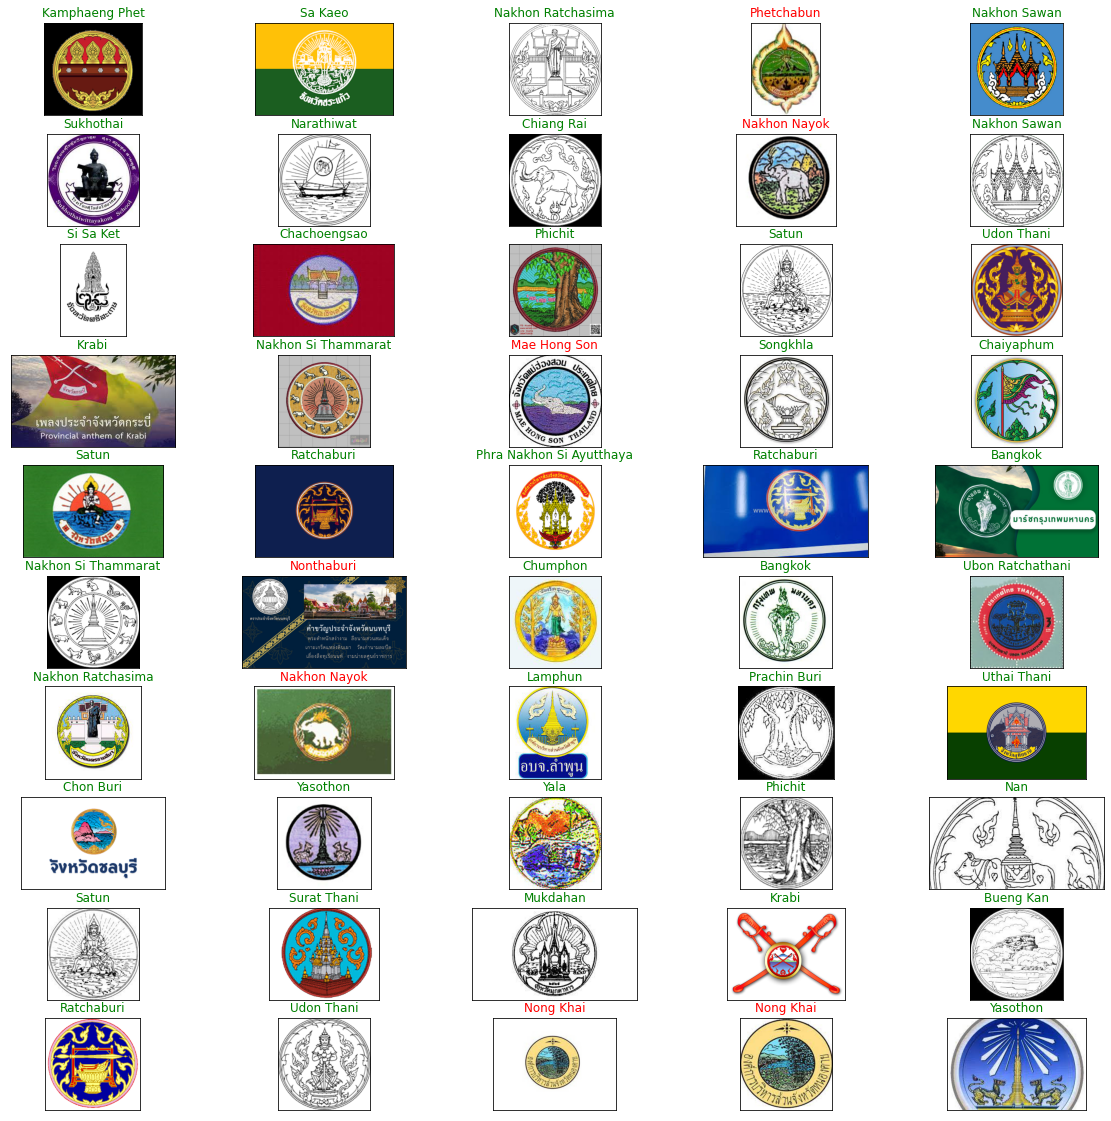

In [74]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test2_dup.images[i]))
    color = "green" if test2_dup.predict[i] == test2_dup.labels[i] else "red"
    ax.set_title(test2_dup.labels[i],color=color)
plt.show()

In [ ]:
!pip install segmentation-models
!pip install tensorflow
!pip install keras
!pip install tensorflow-estimator